* This notebook was made to look at:
1) Total CTD casts carried out by IOS.
2) How seasonally they are distributed?
3) The location?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os
import datetime

import pandas as pd
import netCDF4 as nc
import datetime
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
from salishsea_tools import viz_tools, nc_tools, geo_tools,tidetools
import scipy.io as sio
from glob import glob
import ACTDR
#from datetime import datetime
%matplotlib inline

In [2]:
## the data I created by JieCreate_SOG_dat.py, including all the data
## except duplicate and anomalies.
ACTDR.load_dat('SOG_to.dat')

> open  SOG_to.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  SOG_to.dat
> complete


In [3]:
len(ACTDR.CTD_DAT)

2626

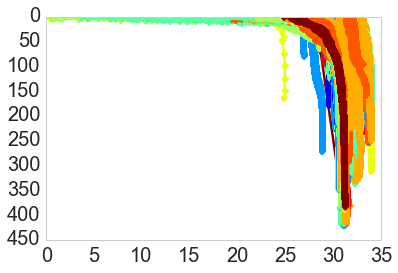

In [4]:
cmap=cm.get_cmap('jet',12)
count=0
for cast in ACTDR.CTD_DAT:
    plt.plot(cast['Salinity'],cast['Depth'],marker='o',c=cmap(cast['Month']-1))
    count=count+1
plt.axis([0,35,450,0])
plt.grid()

/home/jieliu/anaconda3/envs/mypython2/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


(47.5, 50.3)

/home/jieliu/anaconda3/envs/mypython2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


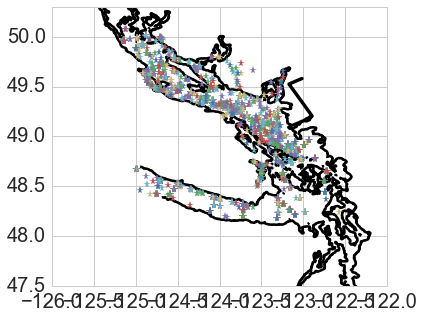

In [5]:
fig, ax = plt.subplots(1,1,figsize = (6,5))
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
grid2 = nc.Dataset('/ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
casts = []
for cast in ACTDR.CTD_DAT:
    year = cast['Year']
    plt.plot(cast['Longitude'], cast['Latitude'], '*', markersize = 8)
        #casts.append(cast['Year'])
#max(casts)
ax.set_xlim([-126.,-122.])
ax.set_ylim([47.5,50.3])

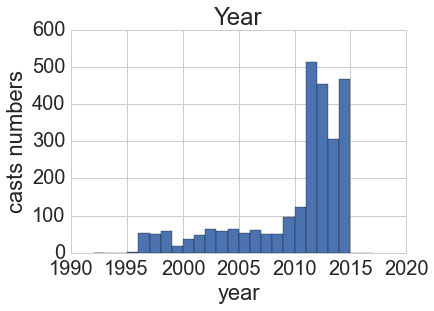

In [6]:
data = pd.DataFrame(ACTDR.CTD_DAT)

max_year = data['Year'].max()
min_year = data['Year'].min()
data.hist('Year', bins = range(min_year - 3, max_year + 4))
plt.ylabel('casts numbers')
plt.xlabel('year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

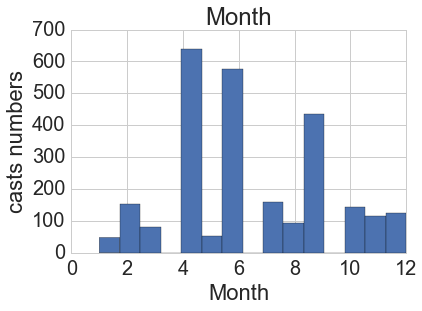

In [7]:
data.hist('Month',bins = 15)
plt.ylabel('casts numbers')
plt.xlabel('Month')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

# Central strait 

In [10]:
def select_cast_cSog(flag, imin, imax, jmin, jmax):
    """This function was made to select 
        the cast in the different SoG region in 
        different month
        1)in all the years if flag = 1
        2)only in year 2014 and the specific month if flag = 2
        3)only except year 2014 if flag = 3"""
    
    s_cast = []
    if flag ==1:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = geo_tools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,land_mask=bathyy.mask,tols = {'NEMO':{'tol_lon': 0.0052,'tol_lat':0.003}})
            if (x1 < jmax) and (x1 > jmin) and (y1 < imax) and (y1 > imin):
                s_cast.append(cast)
    if flag ==2:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = geo_tools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,land_mask=bathyy.mask,tols = {'NEMO':{'tol_lon': 0.0052,'tol_lat':0.003}})
            if (x1 < jmax) and (x1 > jmin) and (y1 < imax) and (y1 > imin) and \
            (cast['Year'] == 2014) and (cast['Month']==10) :
                s_cast.append(cast)
    if flag ==3:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = geo_tools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,land_mask=bathyy.mask,tols = {'NEMO':{'tol_lon': 0.0052,'tol_lat':0.002}})
            if (x1 < jmax) and (x1 > jmin) and (y1 < imax) and (y1 > imin) and \
            (cast['Year'] < 2014):
                s_cast.append(cast)
        
    return s_cast

In [11]:
## Select central SoG data
bathyy, X, Y = tidetools.get_SS2_bathy_data()
sog_data = select_cast_cSog(2,240, 350, 390, 450)
sog = pd.DataFrame(sog_data)

ValueError: No model point found. tol_lon/tol_lat too small or lon/lat outside of domain.

In [ ]:
fig, axs = plt.subplots(1,1,figsize = (6,5))
ax =axs
viz_tools.plot_coastline(ax, grid2, coords = 'map')
casts = []
for cast in sog_data:
    year = cast['Year']
    ax.plot(cast['Longitude'], cast['Latitude'], '*', markersize = 12)
ax.plot(X[390,240:350],Y[390,240:350],'r-')
ax.plot(X[450,240:350],Y[450,240:350],'r-')
ax.plot(X[390:450,240],Y[390:450,240],'r-')
ax.plot(X[390:450,350],Y[390:450,350],'r-')
ax.set_xlim([-124.,-122.8])
ax.set_xticks([-124,-123.6,-123.2,-122.8])
ax.set_ylim([48.5,49.5])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#ax = axs[1]
#sog.hist('Year',ax = ax,bins = 15)
#ax.set_ylabel('casts numbers')
#ax.set_xlabel('year')

#ax = axs[2]
#sog.hist('Month',ax = ax,bins = 15)
#ax.set_ylabel('casts numbers')
#ax.set_xlabel('Month')

In [ ]:
rbr = sio.loadmat('/ocean/jieliu/research/meopar/surface current/rbr.mat')

In [ ]:
values = rbr['a']

In [50]:
arm_station = {'south_arm': {'lat': 49.1292, 'lon': -123.2119},\
               'north_arm': {'lat': 49.2512, 'lon': -123.2633}}

X = grid6.variables['nav_lon']
Y = grid6.variables['nav_lat']
bathy = grid6.variables['Bathymetry']

x1, y1 = geo_tools.find_closest_model_point(arm_station['south_arm']['lon'] , \
     arm_station['south_arm']['lat'],X,Y,grid='NEMO',land_mask=bathyy.mask,tols={'NEMO':{'tol_lon':0.0001,'tol_lat': 0.001}})


ValueError: need more than 1 value to unpack

In [ ]:
geo_tools.find_closest_model_point()